In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
poll_data = pd.read_csv('../../data/mlcourse_open_first_survey_parsed.csv',index_col='id')

In [3]:
poll_data.head()

,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN


In [4]:
poll_data.shape

(2944, 14)

In [5]:
poll_data.columns

Index(['Timestamp', 'Представьтесь в 2-3 фразах',
       'Работали ли Вы с Jupyter notebooks?', 'Что Вы ждете от курса?',
       'Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?',
       'Ладно, посерьезней: согласны ли Вы на обработку персональных данных?',
       'Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)',
       'Чему равна дисперсия равномерного на [0,6] распределения?',
       'Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]',
       'Сколько параметров у нормального распределения?',
       'Сможете написать на Python генератор чисел Фибоначчи?',
       'Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro',
       'Оцените свой уровень владения GitHub',
       'Посоветуйте хороший фильм в стиле "Игра в имитацию" :)'],
      dtype='object')

In [12]:
rename_dic = dict(zip(poll_data.columns,['time','intro','jupiter','expect','sport','personal','math_level','quest1','quest2','quest3','fib_gen','python','github','movie']))

In [13]:
poll_data.rename(columns=rename_dic, inplace=True)

In [14]:
poll_data.head()


,time,intro,jupiter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN


In [17]:
poll_data['jupiter'].value_counts().head()

Да                                                              2071
Нет                                                              766
немного                                                            7
Немного                                                            3
Немного,  недавно начал проходить курс от яндекса на курсоре       2
Name: jupiter, dtype: int64

In [19]:
poll_data['jupiter'].map({'Да':1,'Нет':0}).unique

<bound method Series.unique of id
0       1.0
1       1.0
2       1.0
3       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
19      1.0
20      1.0
21      NaN
22      1.0
23      1.0
24      1.0
25      NaN
26      1.0
27      1.0
28      1.0
29      1.0
30      1.0
31      1.0
       ... 
3180    1.0
3182    0.0
3183    1.0
3184    1.0
3186    0.0
3187    1.0
3188    0.0
3189    1.0
3190    0.0
3191    0.0
3192    1.0
3194    0.0
3195    NaN
3196    0.0
3197    0.0
3198    NaN
3199    1.0
3200    1.0
3202    1.0
3203    0.0
3204    NaN
3205    1.0
3207    1.0
3208    1.0
3209    0.0
3210    1.0
3212    1.0
3213    1.0
3214    1.0
3215    1.0
Name: jupiter, Length: 2944, dtype: float64>

In [21]:
jupiter_values = poll_data['jupiter'].map({'Да':1, 'Нет':0}).fillna(2)

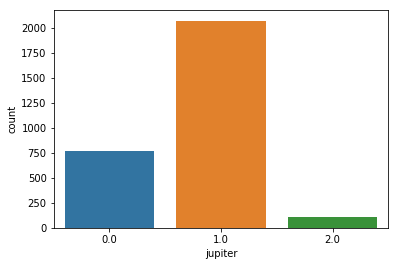

In [23]:
sns.countplot(jupiter_values);

In [25]:
poll_data['sport'].value_counts().head()

Футбол       197
футбол       113
Баскетбол    113
Плавание      94
Хоккей        66
Name: sport, dtype: int64

In [26]:
poll_data['quest1'].head()

id
0      3
1      3
2      3
3    0.5
5      3
Name: quest1, dtype: object

In [27]:
poll_data['quest3'].nunique()

4

In [29]:
(poll_data['quest3']==2).dropna().sum()

2519

In [35]:
poll_data['quest3'][~poll_data['quest3'].isnull()].shape[0]

2725

In [37]:
(poll_data['quest3']==2).dropna().sum()/poll_data['quest3'][~poll_data['quest3'].isnull()].shape[0]*100

92.44036697247707

In [52]:
all_words = np.concatenate(poll_data['intro'].apply(lambda s: s.lower().strip().split()).values)

In [43]:
np.concatenate(np.array([['a','b','c'],['d','e','f']]))

array(['a', 'b', 'c', 'd', 'e', 'f'], dtype='<U1')

In [53]:
len(all_words)

26533

In [55]:
pd.Series(list(all_words)).value_counts().head()

в          1315
и           740
на          429
студент     372
работаю     359
dtype: int64

In [56]:
import nltk
from nltk.corpus import stopwords

In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Diana_Aimbetova\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [66]:
len(stopwords.words('russian'))

151

In [73]:
words_series = pd.Series(list(all_words))
words_series[~words_series.isin(stopwords.words('russian'))].value_counts().head()

студент        372
работаю        359
data           303
хочу           220
интересуюсь    189
dtype: int64